In [42]:
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
import cv2

[[400.0, 127.0, 419.0, 172.0], [603.0, 127.0, 624.0, 172.0], [970.0, 239.0, 990.0, 279.0], [1122.0, 192.0, 1150.0, 248.0]]
[['RedLeft'], ['Green'], ['Green'], ['Green']]
[[606.0, 203.0, 618.0, 230.0], [1185.0, 173.0, 1213.0, 238.0], [796.0, 267.0, 808.0, 294.0], [490.0, 201.0, 501.0, 227.0], [32.8, 273.0, 43.5, 301.0]]
[['Green'], ['Green'], ['Green'], ['RedLeft'], ['RedLeft']]
[[611.0, 295.0, 615.0, 305.0], [579.0, 311.0, 584.0, 321.0]]
[['Red'], ['Red']]
[[764.0, 285.0, 771.0, 304.0], [733.0, 296.0, 740.0, 310.0], [620.0, 258.0, 627.0, 274.0], [573.0, 258.0, 581.0, 274.0], [513.0, 257.0, 518.0, 271.0]]
[['Green'], ['Green'], ['Green'], ['Green'], ['off']]
[[605.0, 302.0, 610.0, 310.0], [619.0, 303.0, 622.0, 311.0], [651.0, 314.0, 655.0, 318.0]]
[['off'], ['off'], ['Red']]


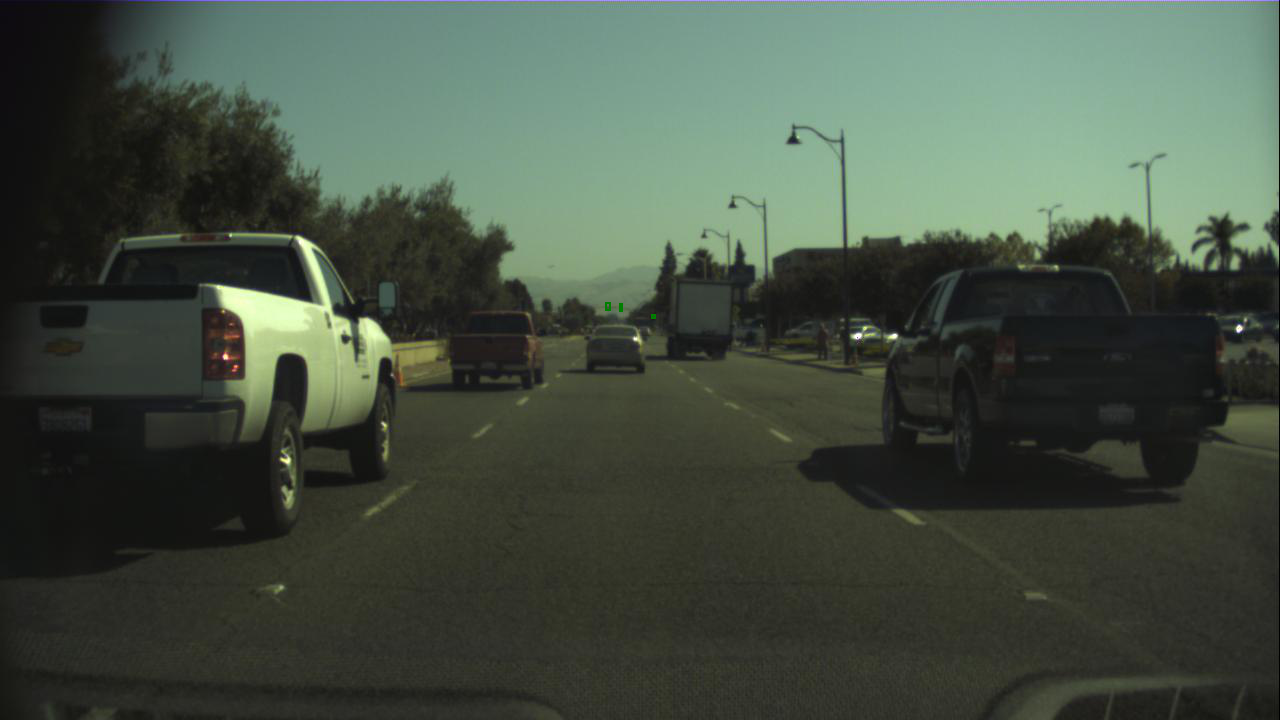

In [94]:
annots=['36930.xml','51638.xml','71062.xml','74482.xml','75940.xml']
images=['36930.png','51638.png','71062.png','74482.png','75940.jpg']
for annot,img in zip(annots,images):
    sample_image = Image.open('/Users/aryansharma/PycharmProjects/traffic light assignment/images/'+img)
    sample_image
    tree = ET.parse('/Users/aryansharma/PycharmProjects/traffic light assignment/coordinates/'+annot)
    root = tree.getroot()

    sample_annotations = []
    Name=[]
    for neighbor in root.iter('object'):
        name = str(neighbor.find('name').text)
        xmin = float(neighbor.find('bndbox/xmin').text[:4])
        ymin = float(neighbor.find('bndbox/ymin').text[:4])
        xmax = float(neighbor.find('bndbox/xmax').text[:4])
        ymax = float(neighbor.find('bndbox/ymax').text[:4])

        #     print(xmin, ymin, xmax, ymax)
        sample_annotations.append([xmin, ymin, xmax, ymax])
        Name.append([name])
    print(sample_annotations)
    print(Name)
    sample_image_annotated = sample_image.copy()

    img_bbox = ImageDraw.Draw(sample_image_annotated)
    rounds=len(sample_annotations)
    #for bbox in sample_annotations:
    savedimg=['1.png','2.png','3.png','4.png','5.png']
    for i in range(rounds):
        #print(sample_annotations[i])
        #img_bbox.textbbox(sample_annotations[i],Name[i])
        img_bbox.rectangle(sample_annotations[i], outline="green",width=2)
        img_bbox.text((200,200),Name[i])
        a=[i]
        sample_image_annotated.save(savedimg[i], bbox_inches='tight')
sample_image_annotated
   
    
    